In [12]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
import scipy.special
import csv

import pickle
from PIL import Image, ImageDraw
import matplotlib.lines as lines
from mpl_toolkits import mplot3d
from matplotlib.lines import Line2D

from tqdm import tqdm
import glob

import seaborn as sns
import pandas as pd

import warnings

from scipy import stats


np.seterr(all='raise')
scipy.special.seterr(all='raise')
np.seterr(under='ignore')
scipy.special.seterr(underflow = 'ignore')


{'singular': 'raise',
 'underflow': 'raise',
 'overflow': 'raise',
 'slow': 'raise',
 'loss': 'raise',
 'no_result': 'raise',
 'domain': 'raise',
 'arg': 'raise',
 'other': 'raise'}

In [2]:
import matplotlib.font_manager as fm# Collect all the font names available to matplotlib
#font_names = [f.name for f in fm.fontManager.ttflist]
#print(font_names)

plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 24
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["lines.markersize"] = 4
#plt.rcParams["lines.linewidth"] = 10


sns.set_style("white")

In [93]:
#!ls ~/Desktop/FlowAnalysis/RawData

names = [
'Factin_YM12.1_singlecells.csv'    ,'MTG_YM12.1_singlecells.csv'
,'Factin_YM13.3_singlecells.csv'    ,'MTG_YM13.3_singlecells.csv'
,'Factin_YM5.3_singlecells.csv'     ,'MTG_YM5.3_singlecells.csv'
,'Factin_YM6.3_singlecells.csv'     ,'MTG_YM6.3_singlecells.csv'
,'Factin_YMP_singlecells.csv'       ,'MTG_YMP_singlecells.csv'
,'Factin_YMR15.4_singlecells.csv'   ,'MTG_YMR15.4_singlecells.csv'
,'Factin_YMRP_singlecells.csv'      ,'MTG_YMRP_singlecells.csv'
,'Factin_YMRpre14_singlecells.csv'  ,'MTG_YMRpre14_singlecells.csv'
,'Factin_YMRpre21_singlecells.csv'  ,'MTG_YMRpre21_singlecells.csv'
,'Factin_YMRpre7_singlecells.csv'   ,'MTG_YMRpre7_singlecells.csv'
,'VIM_YM12.1_singlecells.csv'   ,'TMRM_YM12.1_singlecells.csv'
,'VIM_YM13.3_singlecells.csv'   ,'TMRM_YM13.3_singlecells.csv'
,'VIM_YM5.3_singlecells.csv'    ,'TMRM_YM5.3_singlecells.csv'
,'VIM_YM6.3_singlecells.csv'    ,'TMRM_YM6.3_singlecells.csv'
,'VIM_YMP_singlecells.csv'      ,'TMRM_YMP_singlecells.csv'
,'VIM_YMR15.4_singlecells.csv'  ,'TMRM_YMR15.4_singlecells.csv'
,'VIM_YMRP_singlecells.csv'     ,'TMRM_YMRP_singlecells.csv'
,'VIM_YMRpre14_singlecells.csv' ,'TMRM_YMRpre14_singlecells.csv'
,'VIM_YMRpre21_singlecells.csv' ,'TMRM_YMRpre21_singlecells.csv'
,'VIM_YMRpre7_singlecells.csv'  ,'TMRM_YMRpre7_singlecells.csv'
,'MCJ_YM12.1_singlecells.csv'  
,'MCJ_YM13.3_singlecells.csv'   
,'MCJ_YM5.3_singlecells.csv'   
,'MCJ_YM6.3_singlecells.csv'   
,'MCJ_YMP_singlecells.csv' 
,'MCJ_YMR15.4_singlecells.csv'
,'MCJ_YMRP_singlecells.csv'    
,'MCJ_YMRpre14_singlecells.csv'
,'MCJ_YMRpre21_singlecells.csv' 
,'MCJ_YMRpre7_singlecells.csv'  
]
names

['Factin_YM12.1_singlecells.csv',
 'MTG_YM12.1_singlecells.csv',
 'Factin_YM13.3_singlecells.csv',
 'MTG_YM13.3_singlecells.csv',
 'Factin_YM5.3_singlecells.csv',
 'MTG_YM5.3_singlecells.csv',
 'Factin_YM6.3_singlecells.csv',
 'MTG_YM6.3_singlecells.csv',
 'Factin_YMP_singlecells.csv',
 'MTG_YMP_singlecells.csv',
 'Factin_YMR15.4_singlecells.csv',
 'MTG_YMR15.4_singlecells.csv',
 'Factin_YMRP_singlecells.csv',
 'MTG_YMRP_singlecells.csv',
 'Factin_YMRpre14_singlecells.csv',
 'MTG_YMRpre14_singlecells.csv',
 'Factin_YMRpre21_singlecells.csv',
 'MTG_YMRpre21_singlecells.csv',
 'Factin_YMRpre7_singlecells.csv',
 'MTG_YMRpre7_singlecells.csv',
 'VIM_YM12.1_singlecells.csv',
 'TMRM_YM12.1_singlecells.csv',
 'VIM_YM13.3_singlecells.csv',
 'TMRM_YM13.3_singlecells.csv',
 'VIM_YM5.3_singlecells.csv',
 'TMRM_YM5.3_singlecells.csv',
 'VIM_YM6.3_singlecells.csv',
 'TMRM_YM6.3_singlecells.csv',
 'VIM_YMP_singlecells.csv',
 'TMRM_YMP_singlecells.csv',
 'VIM_YMR15.4_singlecells.csv',
 'TMRM_YMR15.4_

In [3]:
names = [
    
'YM-12.1.csv',   'YM-5.3.csv',    'YM-P.csv',      'YMR-P.csv',     'YMR-pre21.csv',
'YM-13.3.csv',   'YM-6.3.csv',    'YMR-15.4.csv',  'YMR-pre14.csv', 'YMR-pre7.csv',

]
'''
'YM-12.1-1.csv',   'YMR-15.4-1.csv',
'YM-12.1-2.csv',   'YMR-15.4-2.csv',
'YM-13.3-1.csv',   'YMR-pre14-1.csv',
'YM-13.3-2.csv',   'YMR-pre14-2.csv',
'YM-5.3-1.csv',    'YMR-pre21-1.csv',
'YM-5.3-2.csv',    'YMR-pre21-2.csv',
'YM-P-1.csv',      'YMR-pre7-1.csv',
'YM-P-2.csv',      'YMR-pre7-2.csv',
'YM-6.3-0.csv',    'YMR-P-0.csv',
'YM-12.1-0.csv',   'YMR-15.4-0.csv',
'YM-13.3-0.csv',   'YMR-pre14-0.csv',
'YM-5.3-0.csv',    'YMR-pre21-0.csv',
'YM-P-0.csv',      'YMR-pre7-0.csv',
'''

"\n'YM-12.1-1.csv',   'YMR-15.4-1.csv',\n'YM-12.1-2.csv',   'YMR-15.4-2.csv',\n'YM-13.3-1.csv',   'YMR-pre14-1.csv',\n'YM-13.3-2.csv',   'YMR-pre14-2.csv',\n'YM-5.3-1.csv',    'YMR-pre21-1.csv',\n'YM-5.3-2.csv',    'YMR-pre21-2.csv',\n'YM-P-1.csv',      'YMR-pre7-1.csv',\n'YM-P-2.csv',      'YMR-pre7-2.csv',\n'YM-6.3-0.csv',    'YMR-P-0.csv',\n'YM-12.1-0.csv',   'YMR-15.4-0.csv',\n'YM-13.3-0.csv',   'YMR-pre14-0.csv',\n'YM-5.3-0.csv',    'YMR-pre21-0.csv',\n'YM-P-0.csv',      'YMR-pre7-0.csv',\n"

In [121]:
!ls ~/Desktop/FlowAnalysis/CD34

YM-12.1.csv   YM-5.3.csv    YM-P.csv      YMR-P.csv     YMR-pre21.csv
YM-13.3.csv   YM-6.3.csv    YMR-15.4.csv  YMR-pre14.csv YMR-pre7.csv


In [4]:
def nameAndFile(file):
    out = []
    with open(file, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for index,i in enumerate(spamreader):
            if index == 0:
                continue
            if float(i[1])==0:
                continue
            out.append(float(i[0])/float(i[1]))
            #out.append(float(i[0]))
        return out
    
def pandasRead(file):
    out = []
    return pd.read_csv(file)
    
#globalpath = '/Users/trevorchan/Desktop/FlowAnalysis/RawData/'
globalpath = '/Users/trevorchan/Desktop/FlowAnalysis/MHC-I/'

samples = []

for name in tqdm(sorted(names), position=0, leave=True):
    file = globalpath + name
    samples.append((name,nameAndFile(file)))
    #samples.append((name,pandasRead(file)))
#samples

100%|██████████| 10/10 [00:00<00:00, 11.95it/s]


In [136]:
samples

[('YM-12.1.csv',
  [891.2172654296618,
   399.41359152356597,
   390.597119775202,
   210.93181228934404,
   982.8187919463088,
   288.37311337311337,
   176.78438576349023,
   301.21977756286265,
   187.32537143219184,
   284.9116130616253,
   281.9782175700301,
   526.8804085685913,
   92.1692058854221,
   369.87131367292227,
   207.98883572567783,
   263.235988337113,
   436.99412470781476,
   132.7413296378688,
   181.69459998101925,
   169.68539370787417,
   277.0329510814342,
   300.99436807363895,
   275.6722473001543,
   213.01431627447755,
   151.57571884984026,
   615.3887858467684,
   440.58912982258516,
   493.6720201026986,
   181.2843748774077,
   372.62644628099173,
   244.51566391401232,
   676.0165606979152,
   334.78707654794044,
   295.67040468064357,
   224.00778898920163,
   61.507432822262864,
   394.7866101236128,
   547.511911064055,
   570.6413911060433,
   365.14089619217316,
   1249.3541977148534,
   249.19377258826802,
   340.7373461012312,
   460.2460254657

In [7]:
df = pd.DataFrame(samples, columns = ['lineage','intensity'])
df = pd.DataFrame([(float(d), tup.lineage) for tup in df.itertuples() for d in tup.intensity], columns = ['intensity','lineage',])
print(len(df))
df = df[(np.abs(stats.zscore(df.loc[:, 'intensity'])) < .1)]
print(len(df))
#TMRMdf
#plt.xticks(rotation=90)
#sns.violinplot(x = 'lineage', y = 'intensity' , data = df,)


507390
491125


491114


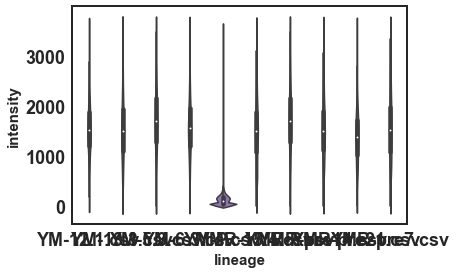

In [13]:
print(len(df))
df = df[df['intensity'] <= 10000] 
df = df[df['intensity'] >= -100] 

sns.violinplot(x = 'lineage', y = 'intensity' , data = df)

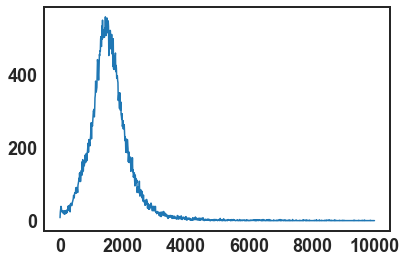

In [38]:
a = np.histogram(samples[0][1], bins = 1000, range = (0,10000))
plt.plot(a[1][0:-1],a[0])
#samples[0][1]

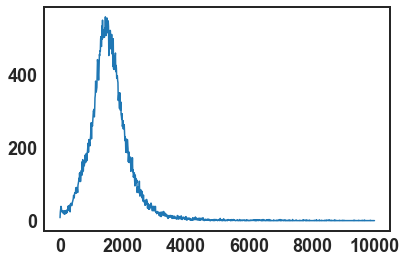

In [42]:
h = np.histogram(samples[0][1], bins = 1000, range = (0,10000))
sns.lineplot(x = h[1][0:-1],y = h[0])

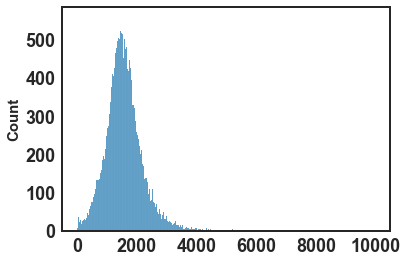

In [50]:
sns.histplot(data = samples[0][1], bins=1000, binrange = (0,10000))

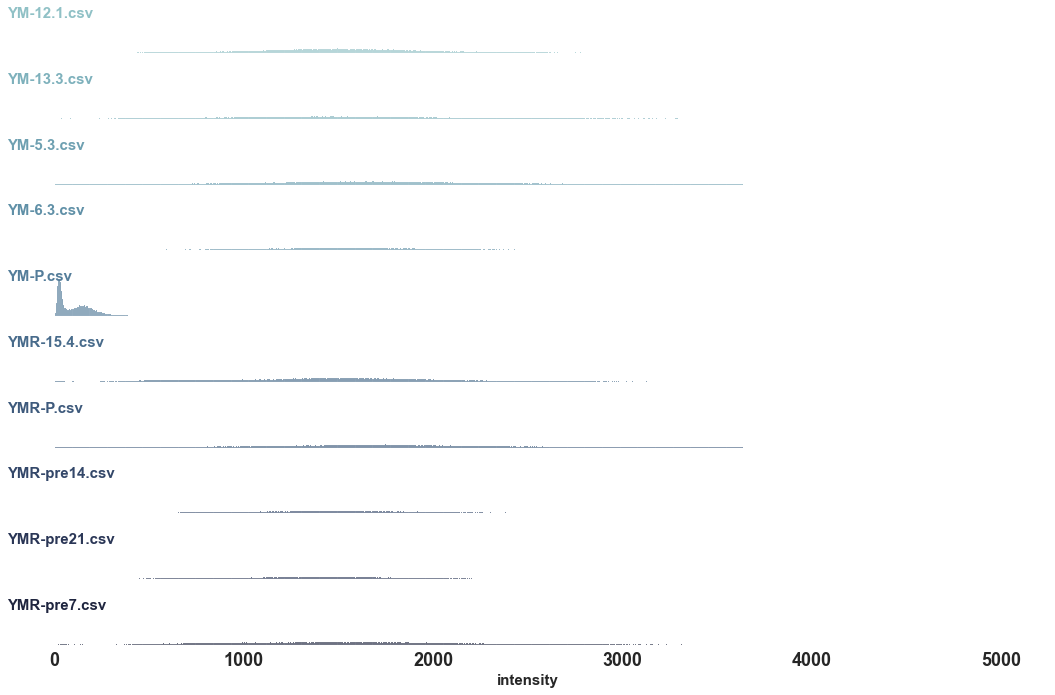

In [56]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="lineage", hue="lineage", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.histplot, "intensity",bins=1000, binrange = (0,5000))
#g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 1, label, color=color,
            ha="left", va="center", transform=ax.transAxes, size='small')

g.map(label, "intensity")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig("CD34_joyplot_10lines.png",format='png',dpi=75)

491114
491114


/Users/trevorchan/environments/machine-learning/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/trevorchan/environments/machine-learning/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/trevorchan/environments/machine-learning/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/Users/trevorchan/environments/machine-learning/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommod

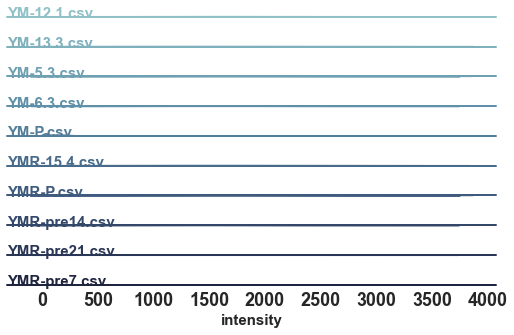

In [52]:
print(len(df))
df = df[df['intensity'] <= 10000] 
df = df[df['intensity'] >= -100] 
print(len(df))

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="lineage", hue="lineage", aspect=15, height=.5, palette=pal, xlim=(-100,10000))

# Draw the densities in a few steps
g.map(sns.kdeplot, "intensity",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=.5, linewidth=1.5)
g.map(sns.kdeplot, "intensity", clip_on=False, color="w", lw=2, bw_adjust=.5,clip=(-100, 10000))
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, 1, label, color=color,
            ha="left", va="center", transform=ax.transAxes, size='small')

g.map(label, "intensity")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig("CD34_joyplot_10lines.png",format='png',dpi=75)

In [98]:
factin = [sample for sample in samples if 'Factin' in sample[0]]
MCJ = [sample for sample in samples if 'MCJ' in sample[0]]
VIM = [sample for sample in samples if 'VIM' in sample[0]]
TMRM = [sample for sample in samples if 'TMRM' in sample[0]]
MTG = [sample for sample in samples if 'MTG' in sample[0]]

factindf = pd.DataFrame(factin, columns = ['lineage','intensity'])
MCJdf = pd.DataFrame(MCJ, columns = ['lineage','intensity'])
VIMdf = pd.DataFrame(VIM, columns = ['lineage','intensity'])
TMRMdf = pd.DataFrame(TMRM, columns = ['lineage','intensity'])
MTGdf = pd.DataFrame(MTG, columns = ['lineage','intensity'])

factindf = pd.DataFrame([(float(d), tup.lineage) for tup in factindf.itertuples() for d in tup.intensity], columns = ['intensity','lineage',])
MCJdf = pd.DataFrame([(float(d), tup.lineage) for tup in MCJdf.itertuples() for d in tup.intensity], columns = ['intensity','lineage',])
VIMdf = pd.DataFrame([(float(d), tup.lineage) for tup in VIMdf.itertuples() for d in tup.intensity], columns = ['intensity','lineage',])
TMRMdf = pd.DataFrame([(float(d), tup.lineage) for tup in TMRMdf.itertuples() for d in tup.intensity], columns = ['intensity','lineage',])
MTGdf = pd.DataFrame([(float(d), tup.lineage) for tup in MTGdf.itertuples() for d in tup.intensity], columns = ['intensity','lineage',])

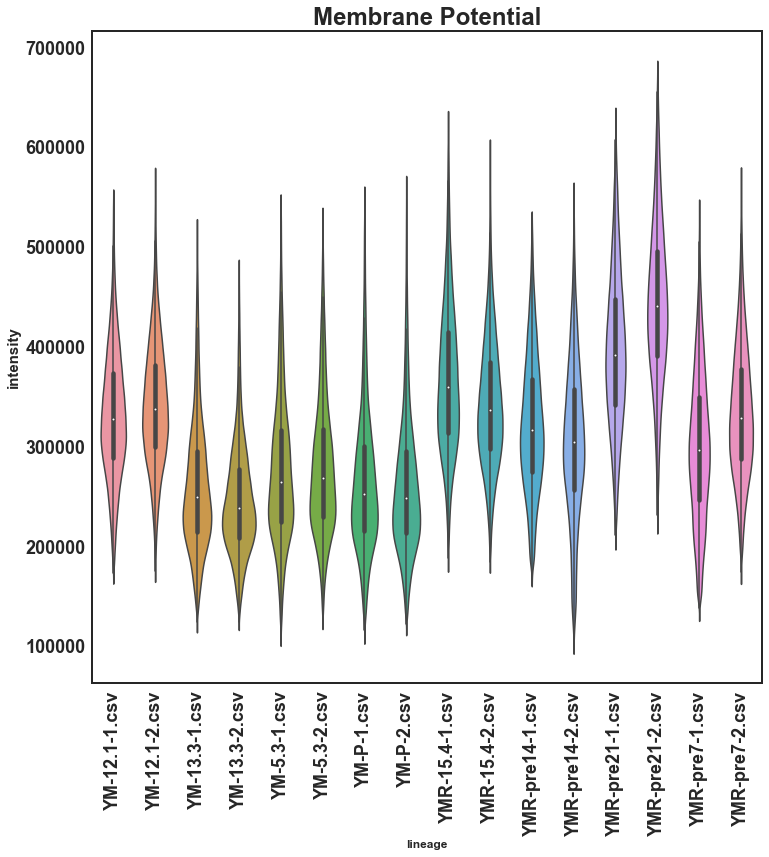

In [53]:
np.seterr(under='ignore')

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.xlabel('xlabel', fontsize=12)
plt.subplots_adjust(hspace = 1.2)

def plotboxy(dataframe,  title, axis, x = 'lineage', y = 'intensity'):
    sns.violinplot(x = x, y = y , ax = axis, data = dataframe)
    axis.set_title(title)

plotboxy(TMRMdf, 'Membrane Potential', ax)
plt.savefig('membranepotential_repeat.png',format = 'png')

In [255]:
factindf.lineage.unique()

array(['Factin_YM12.1_singlecells.csv', 'Factin_YM13.3_singlecells.csv',
       'Factin_YM5.3_singlecells.csv', 'Factin_YM6.3_singlecells.csv',
       'Factin_YMP_singlecells.csv', 'Factin_YMR15.4_singlecells.csv',
       'Factin_YMRP_singlecells.csv', 'Factin_YMRpre14_singlecells.csv',
       'Factin_YMRpre21_singlecells.csv',
       'Factin_YMRpre7_singlecells.csv'], dtype=object)

In [267]:
#* Statistical tests for differences in the features across groups
feature_names = ['intensity']

from scipy import stats
scipy.special.seterr(underflow = 'ignore')

df_long= factindf

all_t = []
all_p = []
    
for lineage in factindf.lineage.unique():
    g1 = df_long[df_long['lineage'] == factindf.lineage.unique()[0]]['intensity'].values
    g2 = df_long[df_long['lineage'] == lineage]['intensity'].values
    print(g1[0:5])
    print(g2[0:5])
    t, p = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)

[13342.   25643.6   1478.15 38625.3  30962.2 ]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[  310.15 38699.1   3847.7     80.5  20791.9 ]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[ 3138.4   9375.95 18475.8     71.05 22618.8 ]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[88408.   29467.6  11527.5  14826.6   3482.75]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[ 9781.1 29013.6 30164.3 50689.1 36364.3]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[19579.7   2593.65 47889.9     90.3   3795.5 ]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[24682.7  19137.2  15915.7  11341.5    858.35]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[ 6.20595e+03  1.81465e+04 -7.60000e+00  2.73622e+04  1.22680e+04]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[ 7594.  10644.  22630.6 10516.1 54006.2]
[13342.   25643.6   1478.15 38625.3  30962.2 ]
[  67.35 3114.2    88.25   19.45 3055.3 ]


In [271]:
df_long= TMRMdf

all_t = []
all_p = []
    
for lineage in df_long.lineage.unique():
    g1 = df_long[df_long['lineage'] == df_long.lineage.unique()[0]]['intensity'].values
    g2 = df_long[df_long['lineage'] == lineage]['intensity'].values
    print(g1[0:5])
    print(g2[0:5])
    t, p = stats.ttest_ind(g1, g2)
    all_t.append(t)
    all_p.append(p)
print(all_t)
print(all_p)

[2883370. 1676160. 1799830. 1066590. 1104590.]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[289234. 236894. 567867. 510426. 362999.]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[1976480.  596537. 1782760.  520555. 1044010.]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[ 614921. 1305150.  559370. 1078710.  932095.]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[ 9316.9 13899.9 14979.2 10194.6 11397.7]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[  23129.2  342552.   358261.  1197540.   214380. ]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[1958410.  625637.  693558.  642859.  572707.]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[ 123635.  866935.  240886. 1170830. -142146.]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[1403550.  397676. 2582540.  676653. 1746190.]
[2883370. 1676160. 1799830. 1066590. 1104590.]
[ 144964.  147389.  129157. 1767770.  410744.]
[0.0, 254.0494229425744, 173.0469342577109, -176.06356715024788, 

In [269]:
print(all_t)
print(all_p)

[0.0, 852.0727729420241, 650.686880672209, 311.1481072925892, 591.673582614658, 279.6709049161302, -183.52895063603967, 419.1778176462837, -339.70096730964326, 714.9485064108395]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


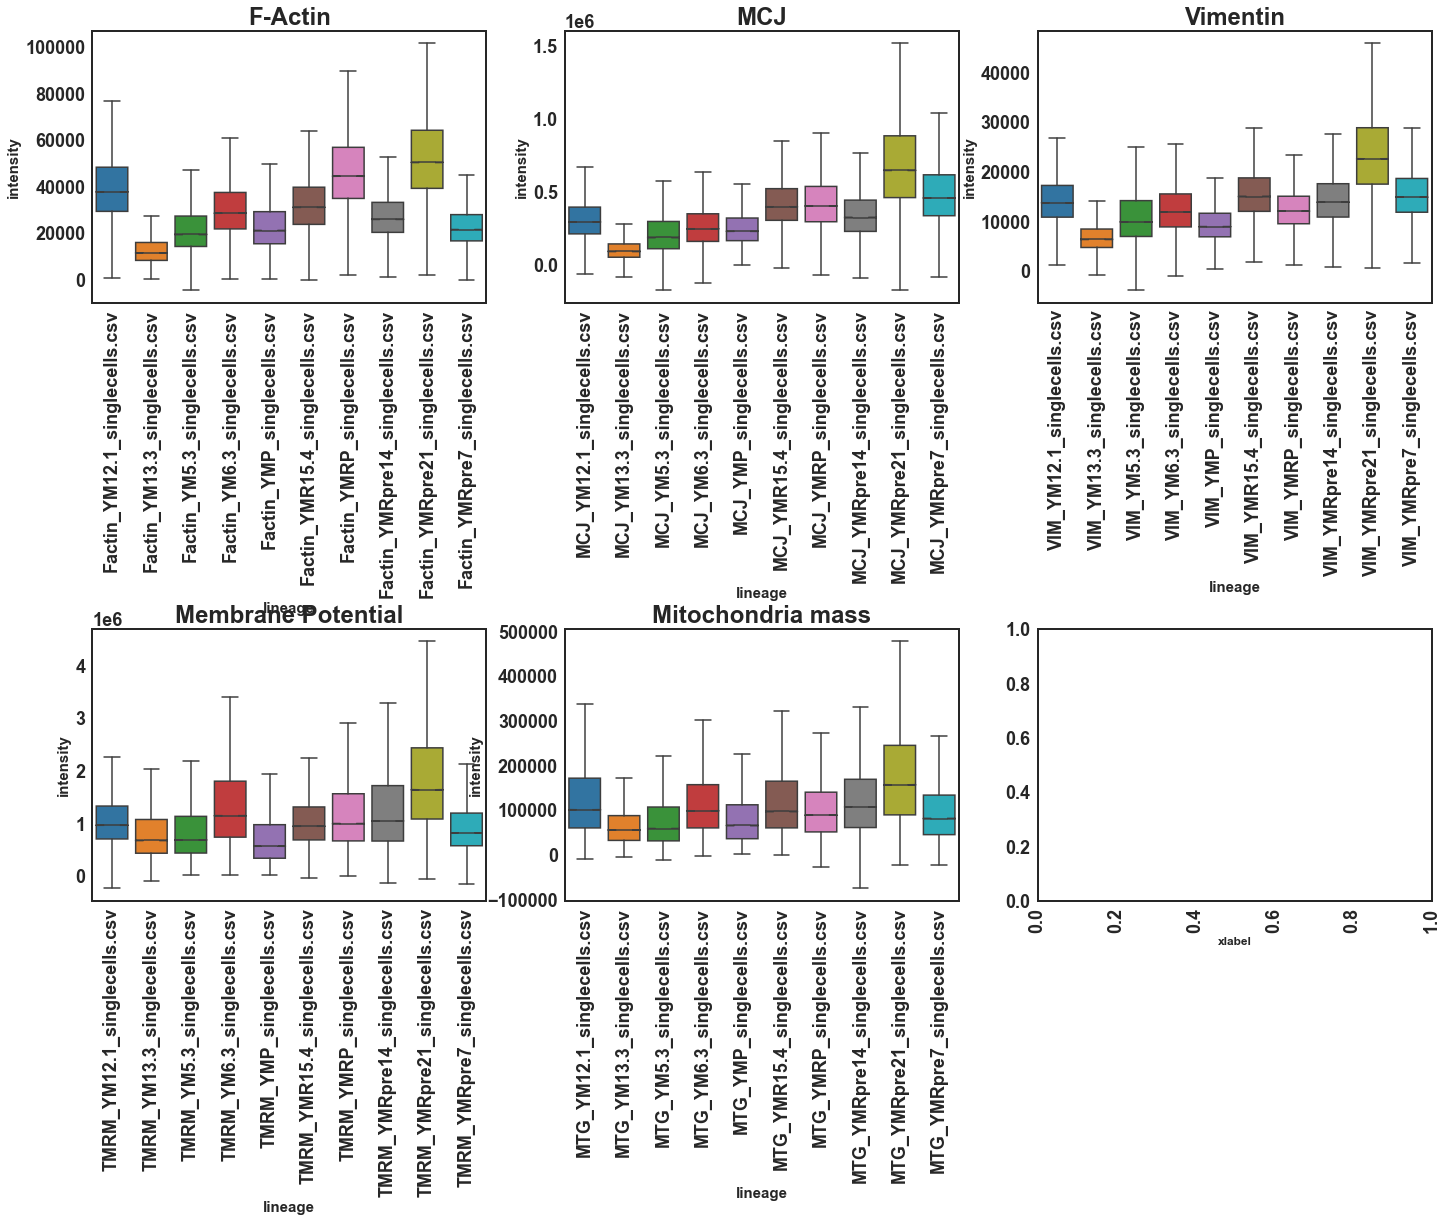

In [292]:
fig, ax = plt.subplots(2, 3, figsize=(24, 16))
for axes in ax:
    for axis in axes:
        plt.setp(axis.xaxis.get_majorticklabels(), rotation=90)
plt.xlabel('xlabel', fontsize=12)
plt.subplots_adjust(hspace = 1.2)

def plotboxy(dataframe,  title, axis, x = 'lineage', y = 'intensity'):
    sns.boxplot(x = x, y = y , ax = axis, data = dataframe, showfliers=False, notch=True)
    axis.set_title(title)

plotboxy(factindf, 'F-Actin', ax[0][0])
plotboxy(MCJdf, 'MCJ', ax[0][1])
plotboxy(VIMdf, 'Vimentin', ax[0][2])
plotboxy(TMRMdf, 'Membrane Potential', ax[1][0])
plotboxy(MTGdf, 'Mitochondria mass', ax[1][1])

#fig.legend([i[0] for i in quant])
plt.savefig('FlowBoxplots.png',format = 'png')

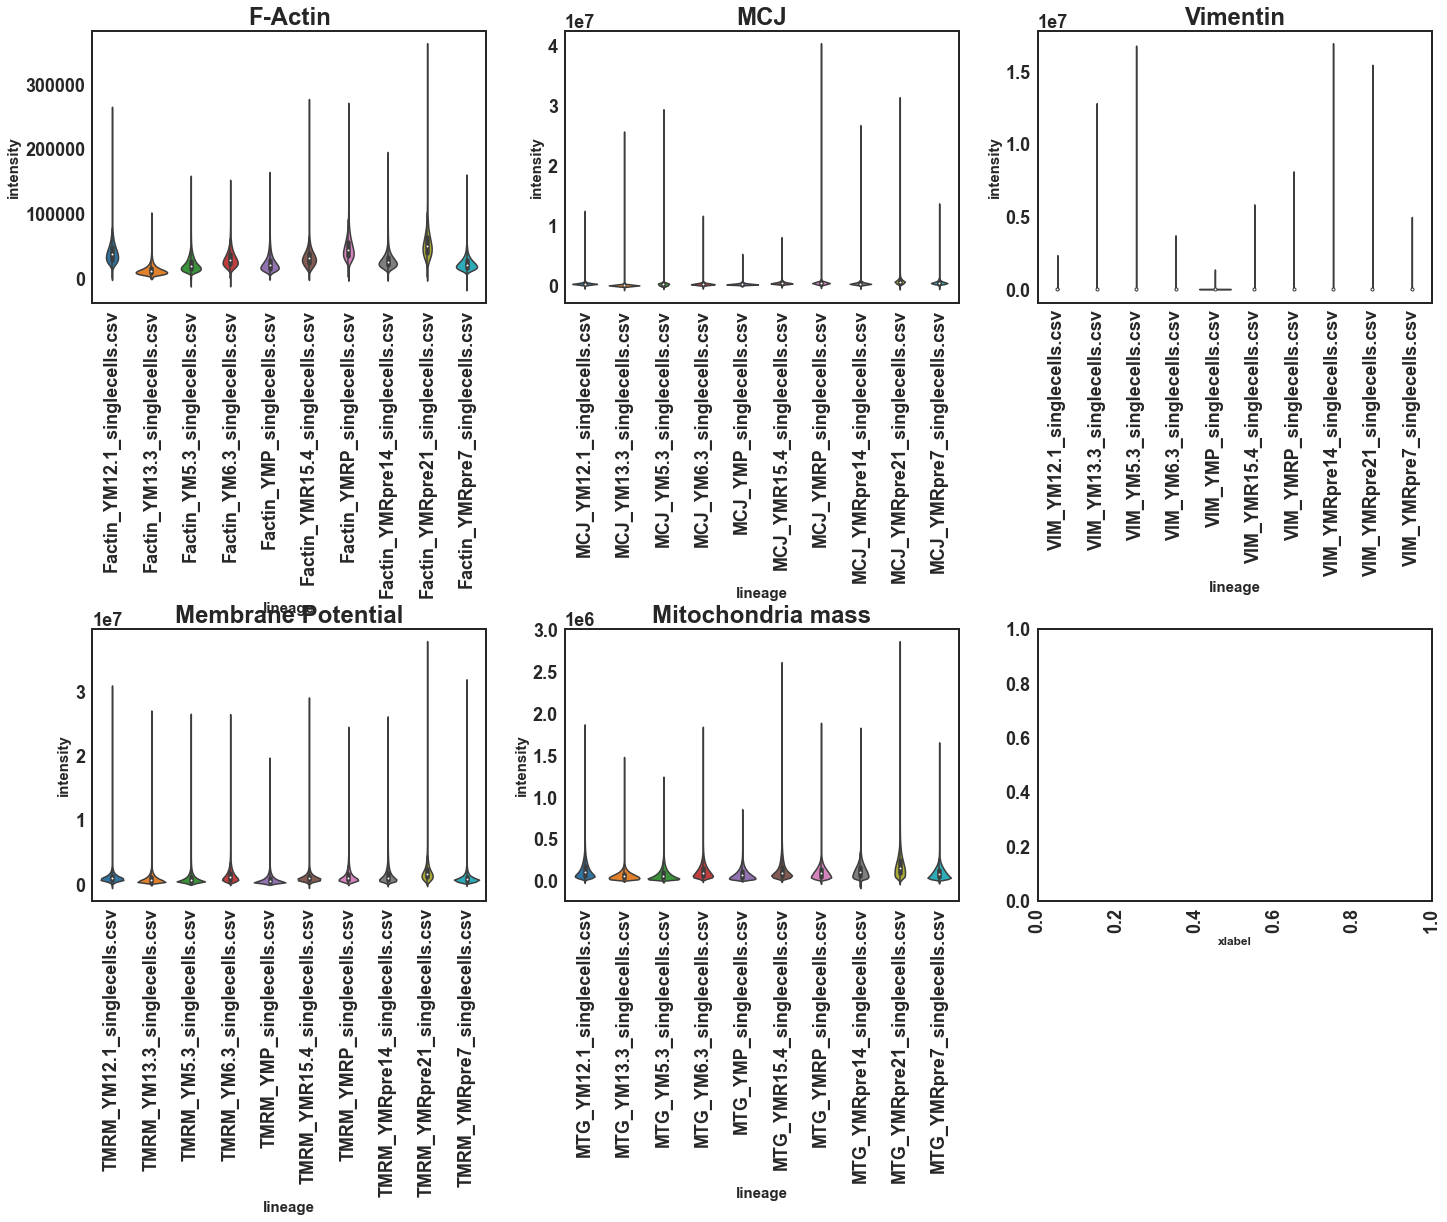

In [293]:
fig, ax = plt.subplots(2, 3, figsize=(24, 16))
for axes in ax:
    for axis in axes:
        plt.setp(axis.xaxis.get_majorticklabels(), rotation=90)
plt.xlabel('xlabel', fontsize=12)
plt.subplots_adjust(hspace = 1.2)

def plotboxy(dataframe,  title, axis, x = 'lineage', y = 'intensity'):
    sns.violinplot(x = x, y = y , ax = axis, data = dataframe)
    axis.set_title(title)

plotboxy(factindf, 'F-Actin', ax[0][0])
plotboxy(MCJdf, 'MCJ', ax[0][1])
plotboxy(VIMdf, 'Vimentin', ax[0][2])
plotboxy(TMRMdf, 'Membrane Potential', ax[1][0])
plotboxy(MTGdf, 'Mitochondria mass', ax[1][1])

#fig.legend([i[0] for i in quant])
plt.savefig('FlowViolinPlots.png',format = 'png')

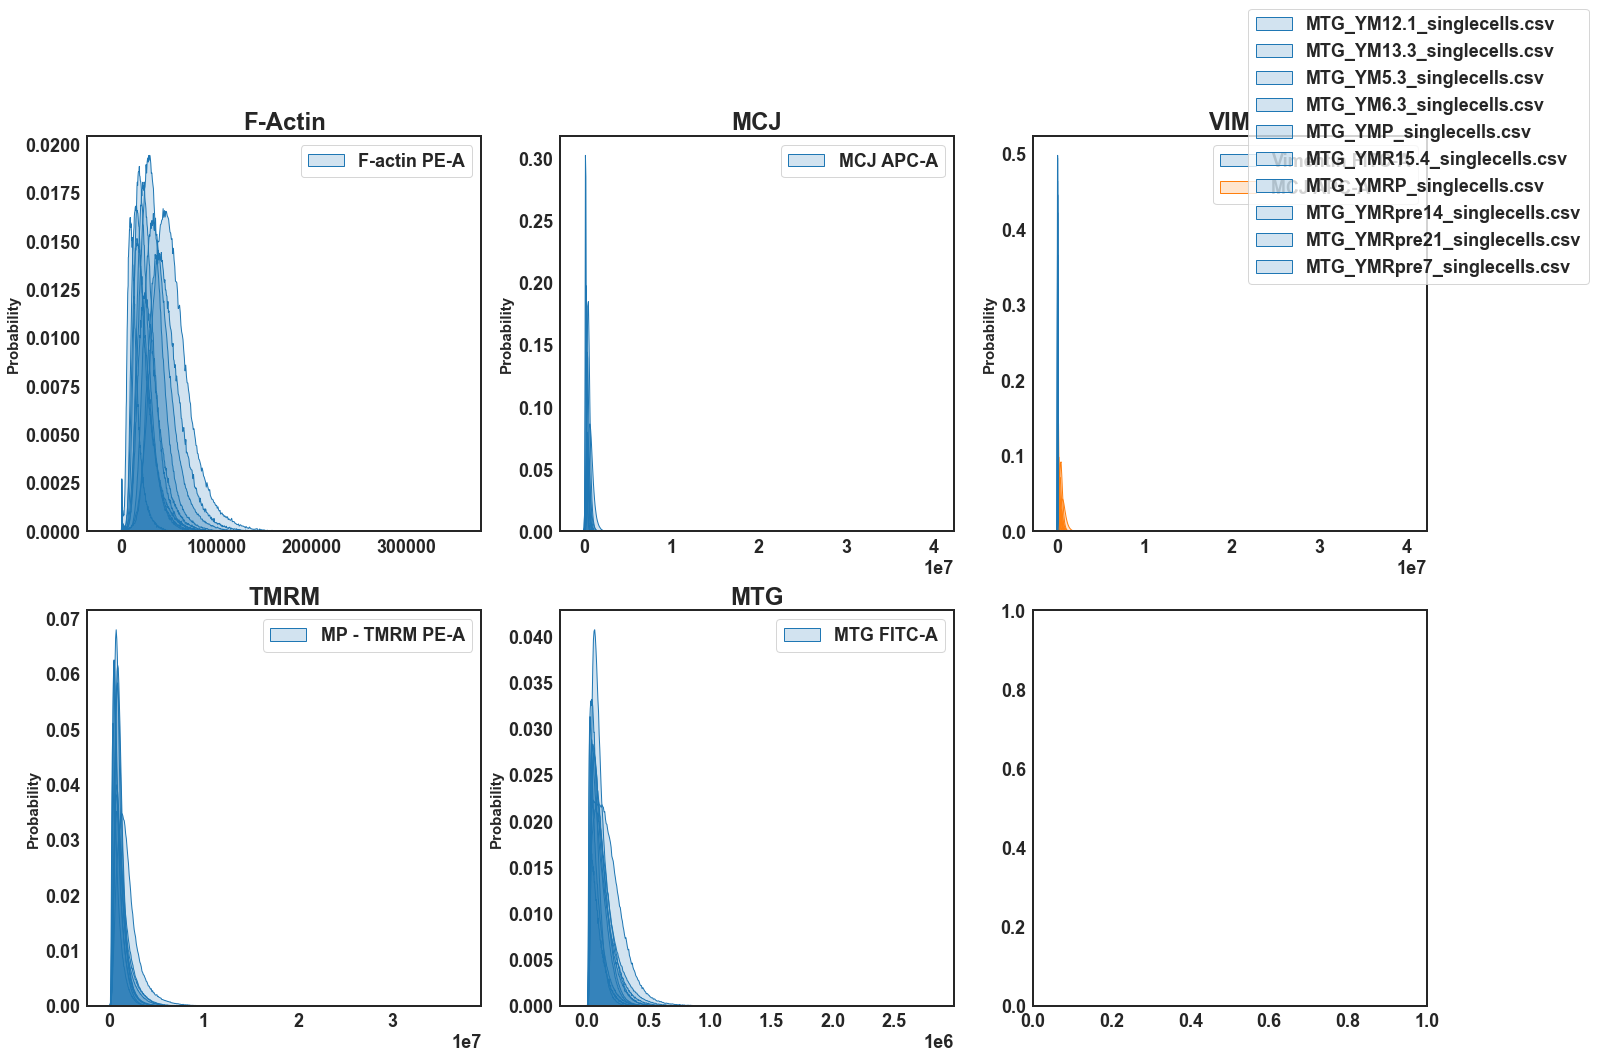

In [164]:

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(24, 16))

quant = factin
title = 'F-Actin'
axis = ax1
for q in quant:
    sns.histplot(data = q[1], ax=axis,element="poly", stat = "probability", alpha = 0.2, bins = 500)
axis.set_title(title)
#axis.legend([i[0] for i in quant])

quant = MCJ
title = 'MCJ'
axis = ax2
for q in quant:
    sns.histplot(data = q[1], ax=axis,element="poly", stat = "probability", alpha = 0.2, bins = 500)
axis.set_title(title)
#axis.legend([i[0] for i in quant])

quant = VIM
title = 'VIM'
axis = ax3
for q in quant:
    sns.histplot(data = q[1], ax=axis,element="poly", stat = "probability", alpha = 0.2, bins = 500)
axis.set_title(title)
#axis.legend([i[0] for i in quant])

quant = TMRM
title = 'TMRM'
axis = ax4
for q in quant:
    sns.histplot(data = q[1], ax=axis,element="poly", stat = "probability", alpha = 0.2, bins = 500)
axis.set_title(title)
#axis.legend([i[0] for i in quant])

quant = MTG
title = 'MTG'
axis = ax5
for q in quant:
    sns.histplot(data = q[1], ax=axis,element="poly", stat = "probability", alpha = 0.2, bins = 500)
axis.set_title(title)
#axis.legend([i[0] for i in quant])

fig.legend([i[0] for i in quant])
